In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Подготовка и очистка данных

В файле содержатся данные о кол-ве велосипедов, сданных в прокат каждый час каждого дня

In [165]:
bike_rentals=pd.read_csv("bike_rental_hour.csv")

In [166]:
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


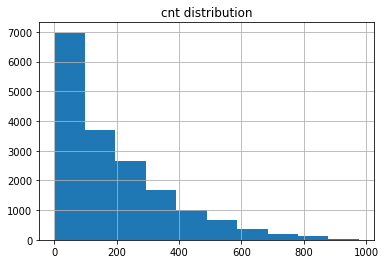

In [167]:
bike_rentals["cnt"].hist()
plt.title("cnt distribution")
plt.show()

In [168]:
corr=bike_rentals.corr()
corr.style.background_gradient(cmap='coolwarm')

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1,0.404046,0.866014,0.489164,-0.00477481,0.0147235,0.00135682,-0.00341556,-0.0141976,0.136178,0.137615,0.00957677,-0.0745045,0.158295,0.282046,0.278379
season,0.404046,1,-0.0107425,0.830386,-0.0061169,-0.00958453,-0.00233535,0.0137431,-0.0145236,0.312025,0.31938,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,0.866014,-0.0107425,1,-0.0104729,-0.003867,0.00669162,-0.00448485,-0.00219601,-0.0191569,0.0409134,0.0392216,-0.0835464,-0.00873953,0.142779,0.253684,0.250495
mnth,0.489164,0.830386,-0.0104729,1,-0.00577191,0.0184303,0.0104001,-0.00347692,0.00539952,0.201691,0.208096,0.164411,-0.135386,0.0684573,0.122273,0.120638
hr,-0.00477481,-0.0061169,-0.003867,-0.00577191,1,0.000479136,-0.00349774,0.002285,-0.0202025,0.137603,0.13375,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.0147235,-0.00958453,0.00669162,0.0184303,0.000479136,1,-0.102088,-0.252471,-0.0170361,-0.0273405,-0.0309727,-0.0105885,0.00398763,0.0315636,-0.0473454,-0.0309273
weekday,0.00135682,-0.00233535,-0.00448485,0.0104001,-0.00349774,-0.102088,1,0.0359551,0.00331074,-0.00179493,-0.00882094,-0.0371583,0.0115015,0.0327214,0.0215779,0.0268999
workingday,-0.00341556,0.0137431,-0.00219601,-0.00347692,0.002285,-0.252471,0.0359551,1,0.0446722,0.0553903,0.0546672,0.0156875,-0.0118298,-0.300942,0.134326,0.0302844
weathersit,-0.0141976,-0.0145236,-0.0191569,0.00539952,-0.0202025,-0.0170361,0.00331074,0.0446722,1,-0.10264,-0.105563,0.41813,0.0262257,-0.152628,-0.120966,-0.142426
temp,0.136178,0.312025,0.0409134,0.201691,0.137603,-0.0273405,-0.00179493,0.0553903,-0.10264,1,0.987672,-0.0698814,-0.0231253,0.459616,0.335361,0.404772


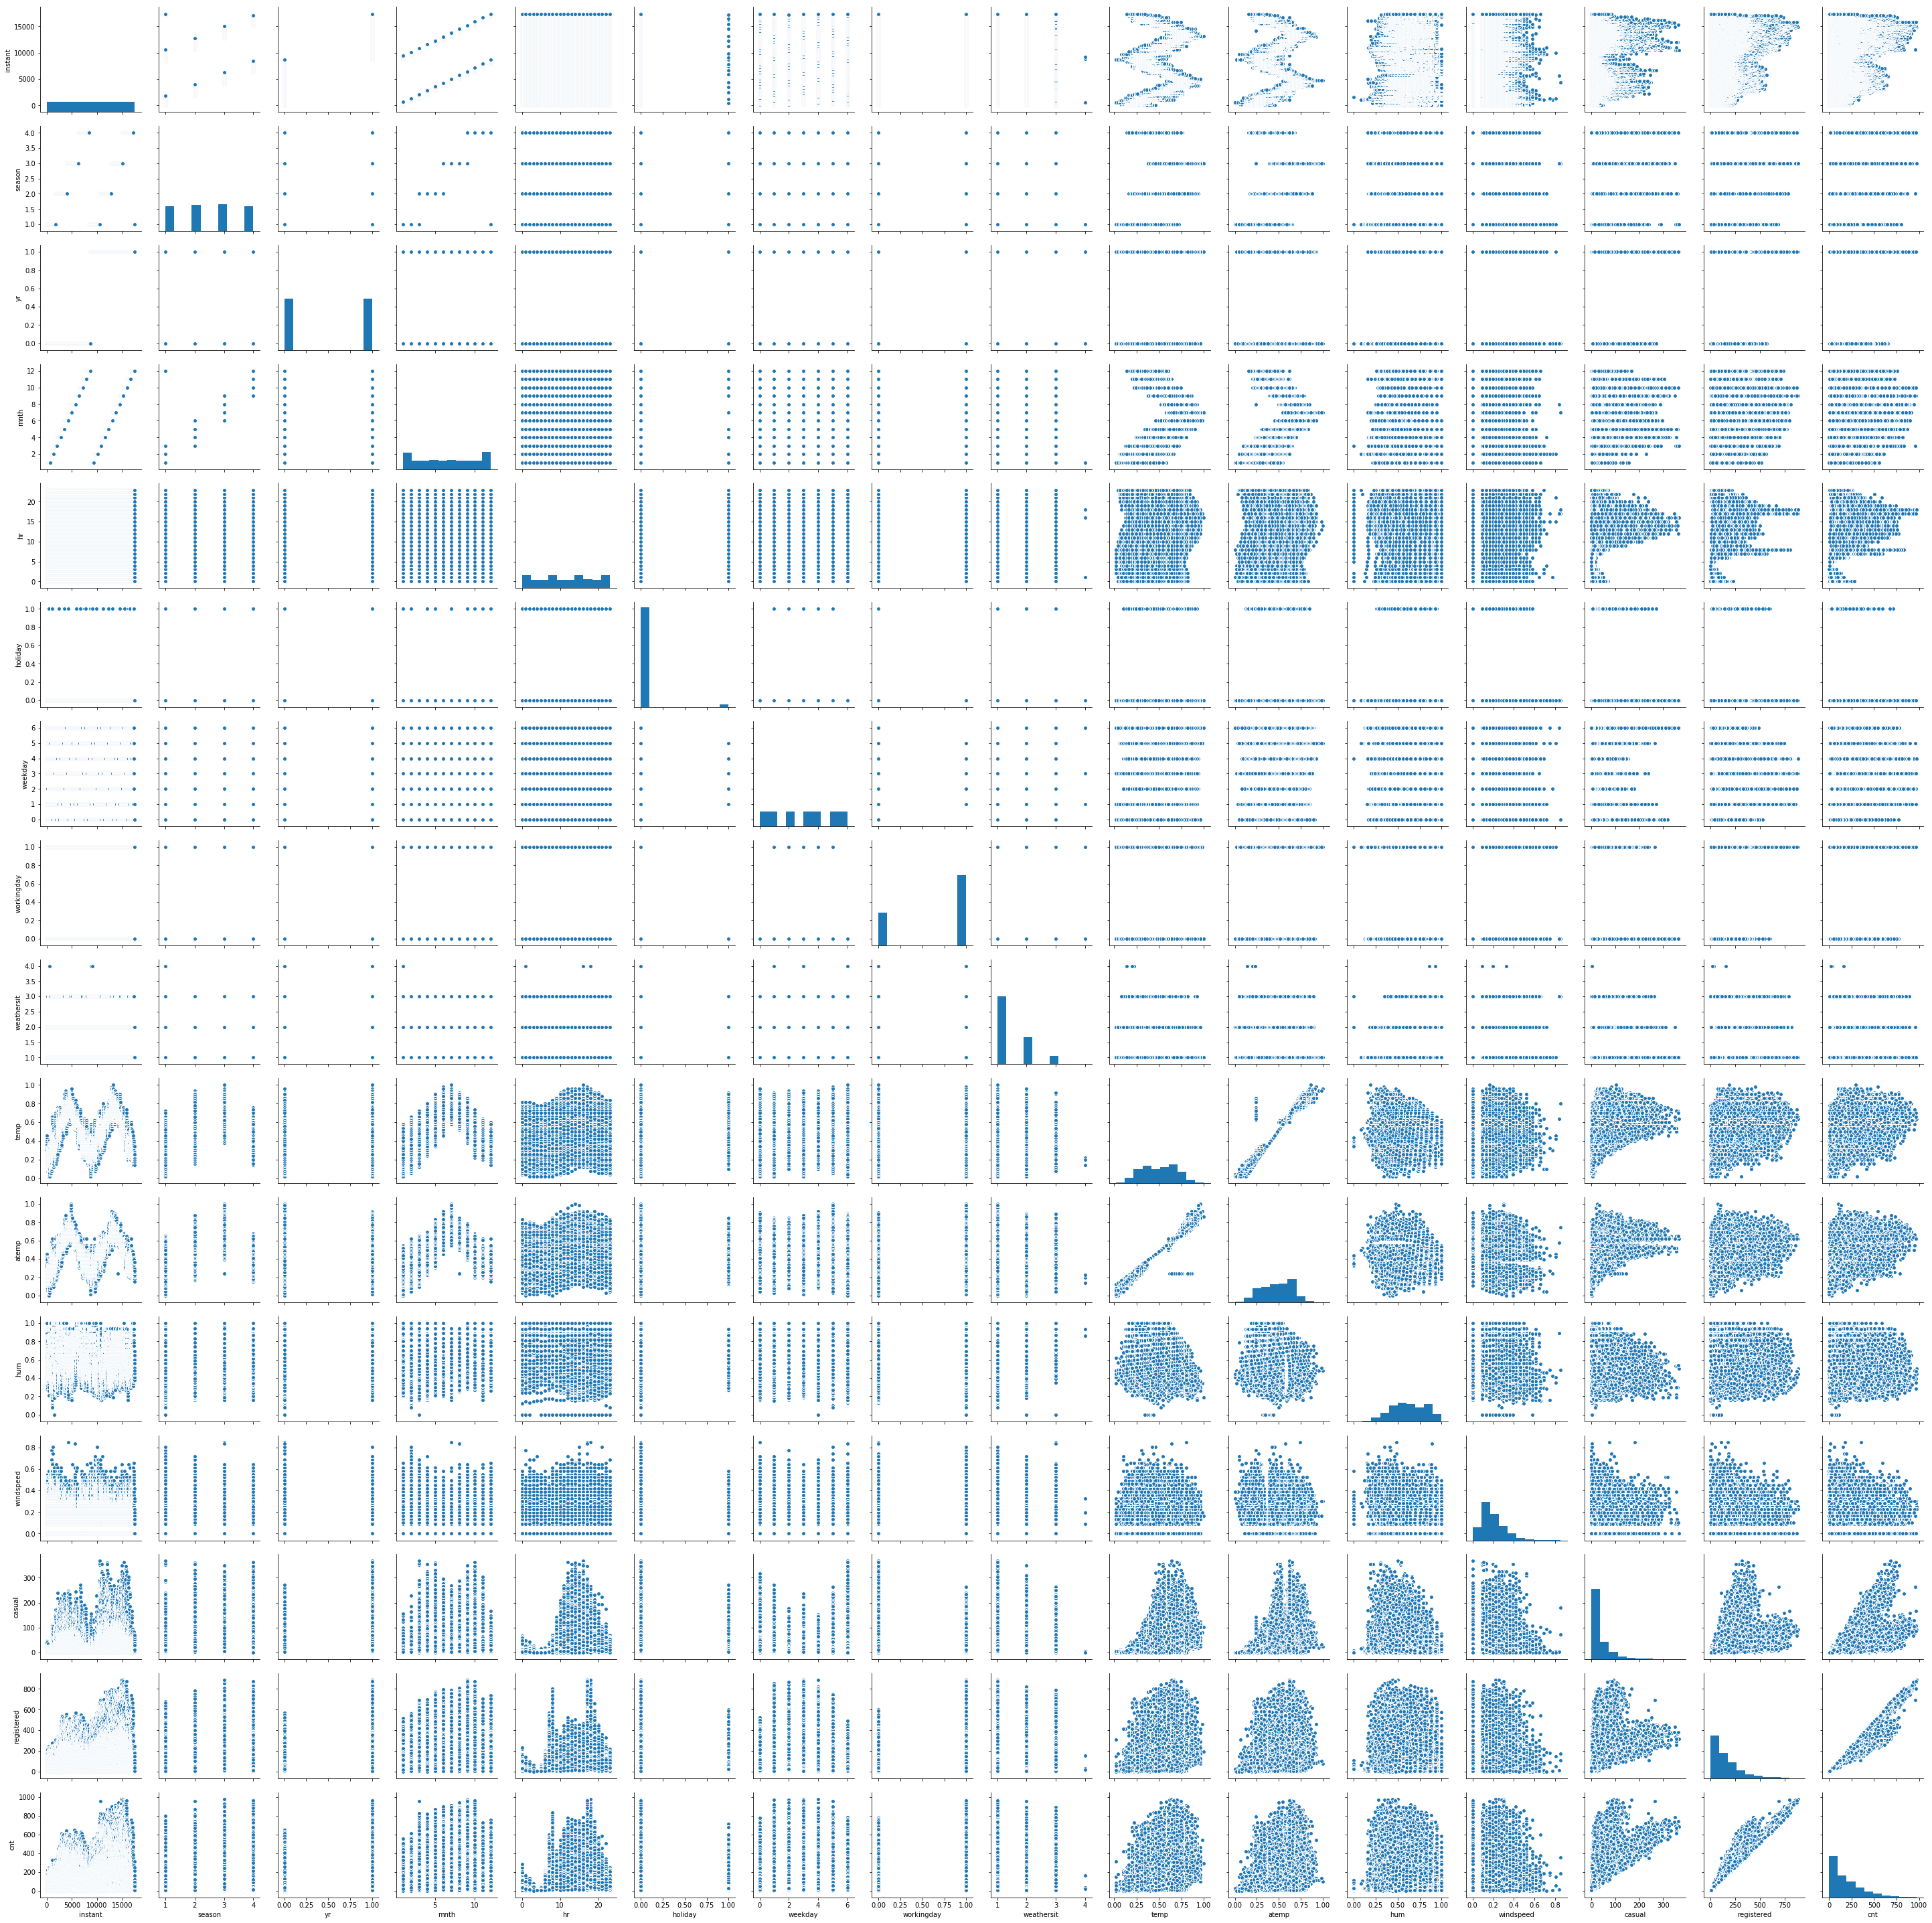

In [169]:
sns.pairplot(bike_rentals)
plt.show()

In [170]:
#Функция для замены значений в столбце hr 
def assign_label(hour):
    if hour >=0 and hour < 6:
        return 4
    elif hour >=6 and hour < 12:
        return 1
    elif hour >= 12 and hour < 18:
        return 2
    elif hour >= 18 and hour <=24:
        return 3

In [171]:
#Применим функцию к столбцу
bike_rentals["time_label"]=bike_rentals["hr"].apply(assign_label)

# Сформируем выборки для тренировки и тестирования модели

In [172]:
train=bike_rentals.sample(n=round(len(bike_rentals)*0.8), random_state=1)

In [173]:
test=bike_rentals.drop(train.index)

In [174]:
len(test)+len(train)

17379

In [175]:
len(bike_rentals)

17379

In [176]:
features=bike_rentals.columns.drop(['cnt', 'casual', 'dteday','registered'])
target=["cnt"]

In [177]:
target_2=["casual"]
target_3=["registered"]

In [178]:
features

Index(['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'time_label'],
      dtype='object')

Метрика среднеквадратичной ошибки имеет наибольший смысл для оценки ошибки в этой задаче. MSE работает на непрерывных числовых данных, что соответствует целевой метрике довольно хорошо.

# Протестирую работу LinearRegression

In [179]:
model_1=LinearRegression()
model_1.fit(train[features],train['cnt'])
preds=model_1.predict(test[features])
mse_1=mean_squared_error(test["cnt"],preds)
rmse_1=np.sqrt(mse_1)
print(mse_1,rmse_1)

17052.12487124757 130.5837848710458


In [180]:
model_11=LinearRegression()
model_11.fit(train[features],train['casual'])
preds=model_11.predict(test[features])
mse_11=mean_squared_error(test["casual"],preds)
rmse_11=np.sqrt(mse_11)
print(mse_11,rmse_11)

1261.9069520170851 35.52332968651848


In [181]:
model_12=LinearRegression()
model_12.fit(train[features],train['registered'])
preds=model_12.predict(test[features])
mse_12=mean_squared_error(test["registered"],preds)
rmse_12=np.sqrt(mse_12)
print(mse_12,rmse_12)

12821.747306189534 113.23315462438346


In [182]:
data = {'model_type':['LinearRegression_cnt', 'LinearRegression_casual', 'LinearRegression_registered'], 'mse':[mse_1, mse_11, mse_12], 'rmse':[rmse_1, rmse_11, rmse_12]} 
result= pd.DataFrame(data) 


In [183]:
result

,model_type,mse,rmse
0,LinearRegression_cnt,17052.124871,130.583785
1,LinearRegression_casual,1261.906952,35.523330
2,LinearRegression_registered,12821.747306,113.233155


# Протестирую работу DecisionTreeRegressor

In [184]:
model_2=DecisionTreeRegressor()
model_2.fit(train[features],train['cnt'])
preds_2=model_2.predict(test[features])
mse_2=mean_squared_error(test["cnt"],preds_2)
rmse_2=np.sqrt(mse_2)
print(mse_2,rmse_2)

3250.184407364787 57.01038859159607


In [185]:
model_21=DecisionTreeRegressor()
model_21.fit(train[features],train['casual'])
preds_21=model_21.predict(test[features])
mse_21=mean_squared_error(test["casual"],preds_21)
rmse_21=np.sqrt(mse_21)
print(mse_21,rmse_21)

388.9974108170311 19.72301728481297


In [186]:
model_22=DecisionTreeRegressor()
model_22.fit(train[features],train['registered'])
preds_22=model_22.predict(test[features])
mse_22=mean_squared_error(test["registered"],preds_22)
rmse_22=np.sqrt(mse_22)
print(mse_22,rmse_22)

2439.179516685846 49.38805034303183


In [187]:
model_3=DecisionTreeRegressor(min_samples_leaf=2)
model_3.fit(train[features],train['cnt'])
preds_3=model_3.predict(test[features])
mse_3=mean_squared_error(test["cnt"],preds_3)
rmse_3=np.sqrt(mse_3)
print(mse_3,rmse_3)

2962.443797148702 54.42833634375298


In [188]:
model_31=DecisionTreeRegressor(min_samples_leaf=2)
model_31.fit(train[features],train['casual'])
preds_31=model_31.predict(test[features])
mse_31=mean_squared_error(test["casual"],preds_31)
rmse_31=np.sqrt(mse_31)
print(mse_31,rmse_31)

341.0279775604143 18.466942832001575


In [189]:
model_32=DecisionTreeRegressor(min_samples_leaf=2)
model_32.fit(train[features],train['registered'])
preds_32=model_32.predict(test[features])
mse_32=mean_squared_error(test["registered"],preds_32)
rmse_32=np.sqrt(mse_32)
print(mse_32,rmse_32)

2213.717994821634 47.0501646630661


In [190]:
data = {'model_type':['LinearRegression_cnt','DecisionTreeRegressor_cnt', 'LinearRegression_casual','DecisionTreeRegressor_casual' ,'LinearRegression_registered','DecisionTreeRegressor_registered'], 'mse':[mse_1,mse_2, mse_11,mse_21, mse_12,mse_22], 'rmse':[rmse_1,rmse_2, rmse_11,rmse_21, rmse_12,rmse_22]} 
result= pd.DataFrame(data) 


In [191]:
result

,model_type,mse,rmse
0,LinearRegression_cnt,17052.124871,130.583785
1,DecisionTreeRegressor_cnt,3250.184407,57.010389
2,LinearRegression_casual,1261.906952,35.523330
3,DecisionTreeRegressor_casual,388.997411,19.723017
4,LinearRegression_registered,12821.747306,113.233155
5,DecisionTreeRegressor_registered,2439.179517,49.388050


In [192]:
model_4=DecisionTreeRegressor()
param_grid = {
    'max_features': [2, 3,4,5,6,7,8,9,10]
}
grid_search = GridSearchCV(estimator = model_4, param_grid = param_grid)
grid_search.fit(train[features],train['cnt'])
print(grid_search.best_params_)

{'max_features': 9}


In [193]:
grid_search = GridSearchCV(estimator = model_4, param_grid = param_grid)
grid_search.fit(train[features],train['casual'])
print(grid_search.best_params_)

{'max_features': 8}


In [194]:
grid_search = GridSearchCV(estimator = model_4, param_grid = param_grid)
grid_search.fit(train[features],train['registered'])
print(grid_search.best_params_)

{'max_features': 9}


In [198]:
model_4=DecisionTreeRegressor(min_samples_leaf=7)
model_4.fit(train[features],train['cnt'])
preds_4=model_4.predict(test[features])
mse_4=mean_squared_error(test["cnt"],preds_4)
rmse_4=np.sqrt(mse_4)
print(mse_4,rmse_4)

2585.346902001168 50.84630667021124


In [202]:
model_41=DecisionTreeRegressor(min_samples_leaf=6)
model_41.fit(train[features],train['casual'])
preds_41=model_41.predict(test[features])
mse_41=mean_squared_error(test["casual"],preds_41)
rmse_41=np.sqrt(mse_41)
print(mse_41,rmse_41)

320.4478169294141 17.90105630764325


In [207]:
model_42=DecisionTreeRegressor(min_samples_leaf=9)
model_42.fit(train[features],train['registered'])
preds_42=model_42.predict(test[features])
mse_42=mean_squared_error(test["registered"],preds_42)
rmse_42=np.sqrt(mse_42)
print(mse_42,rmse_42)

2010.080448013075 44.83392072987901


In [208]:
data = {'model_type':['LinearRegression_cnt','DecisionTreeRegressor_cnt', 'DecisionTreeRegressor_cnt_2leaf', 'DecisionTreeRegressor_cnt_7leaf',
                      'LinearRegression_casual','DecisionTreeRegressor_casual' ,'DecisionTreeRegressor_casual_2leaf','DecisionTreeRegressor_casual_6leaf',
                      'LinearRegression_registered','DecisionTreeRegressor_registered','DecisionTreeRegressor_registered_2leaf','DecisionTreeRegressor_registered_9leaf'],
        'mse':[mse_1,mse_2,mse_3,mse_4, mse_11,mse_21,mse_31,mse_41, mse_12,mse_22,mse_32,mse_42], 
        'rmse':[rmse_1,rmse_2,rmse_3,rmse_4, rmse_11,rmse_21,rmse_31,rmse_41, rmse_12,rmse_22,rmse_32,rmse_42]} 
result= pd.DataFrame(data) 

In [209]:
result

,model_type,mse,rmse
0,LinearRegression_cnt,17052.124871,130.583785
1,DecisionTreeRegressor_cnt,3250.184407,57.010389
2,DecisionTreeRegressor_cnt_2leaf,2962.443797,54.428336
3,DecisionTreeRegressor_cnt_7leaf,2585.346902,50.846307
4,LinearRegression_casual,1261.906952,35.523330
5,DecisionTreeRegressor_casual,388.997411,19.723017
6,DecisionTreeRegressor_casual_2leaf,341.027978,18.466943
7,DecisionTreeRegressor_casual_6leaf,320.447817,17.901056
8,LinearRegression_registered,12821.747306,113.233155
9,DecisionTreeRegressor_registered,2439.179517,49.388050


# Протестирую работу RandomForestRegressor

In [210]:
model_5=RandomForestRegressor()
model_5.fit(train[features],train['cnt'])
preds_5=model_5.predict(test[features])
mse_5=mean_squared_error(test["cnt"],preds_5)
rmse_5=np.sqrt(mse_5)
print(mse_5,rmse_5)

2177.1157652474108 46.65957313614657


In [211]:
model_51=RandomForestRegressor()
model_51.fit(train[features],train['casual'])
preds_51=model_51.predict(test[features])
mse_51=mean_squared_error(test["casual"],preds_51)
rmse_51=np.sqrt(mse_51)
print(mse_51,rmse_51)

212.89214614499423 14.590824039271881


In [212]:
model_52=RandomForestRegressor()
model_52.fit(train[features],train['registered'])
preds_52=model_52.predict(test[features])
mse_52=mean_squared_error(test["registered"],preds_52)
rmse_52=np.sqrt(mse_52)
print(mse_52,rmse_52)

1427.8551409666281 37.78697051850847


In [213]:
model_6=RandomForestRegressor(min_samples_leaf=10)
model_6.fit(train[features],train['cnt'])
preds_6=model_6.predict(test[features])
mse_6=mean_squared_error(test["cnt"],preds_6)
rmse_6=np.sqrt(mse_6)
print(mse_6,rmse_6)

2495.8037863852055 49.958020240850274


In [214]:
model_61=RandomForestRegressor(min_samples_leaf=7)
model_61.fit(train[features],train['casual'])
preds_61=model_61.predict(test[features])
mse_61=mean_squared_error(test["casual"],preds_61)
rmse_61=np.sqrt(mse_61)
print(mse_61,rmse_61)

256.7972455182803 16.024894555605673


In [238]:
model_62=RandomForestRegressor(min_samples_leaf=10)
model_62.fit(train[features],train['registered'])
preds_62=model_62.predict(test[features])
mse_62=mean_squared_error(test["registered"],preds_62)
rmse_62=np.sqrt(mse_62)
print(mse_62,rmse_62)

1681.0910566039988 41.00111043135294


In [241]:
model_7=RandomForestRegressor(min_samples_leaf=2)
model_7.fit(train[features],train['cnt'])
preds_7=model_7.predict(test[features])
mse_7=mean_squared_error(test["cnt"],preds_7)
rmse_7=np.sqrt(mse_7)
print(mse_7,rmse_7)

2025.7744325929064 45.0086039840485


In [242]:
model_71=RandomForestRegressor(min_samples_leaf=2)
model_71.fit(train[features],train['casual'])
preds_71=model_71.predict(test[features])
mse_71=mean_squared_error(test["casual"],preds_71)
rmse_71=np.sqrt(mse_71)
print(mse_71,rmse_71)

214.83643112263601 14.657299584938421


In [243]:
model_72=RandomForestRegressor(min_samples_leaf=2)
model_72.fit(train[features],train['registered'])
preds_72=model_72.predict(test[features])
mse_72=mean_squared_error(test["registered"],preds_72)
rmse_72=np.sqrt(mse_72)
print(mse_72,rmse_72)

1429.3303379481295 37.806485395340964


In [244]:
model_5=RandomForestRegressor()
param_grid = {
    'min_samples_leaf': [2, 3,4,5,6,7,8,9,10]
}
grid_search = GridSearchCV(estimator = model_5, param_grid = param_grid)
grid_search.fit(train[features],train['cnt'])
print(grid_search.best_params_)

{'min_samples_leaf': 2}


In [245]:
grid_search = GridSearchCV(estimator = model_5, param_grid = param_grid)
grid_search.fit(train[features],train['casual'])
print(grid_search.best_params_)

{'min_samples_leaf': 2}


In [246]:
grid_search = GridSearchCV(estimator = model_5, param_grid = param_grid)
grid_search.fit(train[features],train['registered'])
print(grid_search.best_params_)

{'min_samples_leaf': 2}


In [248]:
data = {'model_type':['LinearRegression_cnt','DecisionTreeRegressor_cnt', 'DecisionTreeRegressor_cnt_2leaf', 'DecisionTreeRegressor_cnt_7leaf',"RandomForestRegressor_cnt","RandomForestRegressor_cnt_10leaf","RandomForestRegressor_cnt_2leaf",
                      'LinearRegression_casual','DecisionTreeRegressor_casual' ,'DecisionTreeRegressor_casual_2leaf','DecisionTreeRegressor_casual_6leaf','RandomForestRegressor_casual','RandomForestRegressor_casual_7leaf','RandomForestRegressor_casual_2leaf',
                      'LinearRegression_registered','DecisionTreeRegressor_registered','DecisionTreeRegressor_registered_2leaf','DecisionTreeRegressor_registered_9leaf','RandomForestRegressor_casual','RandomForestRegressor_casual_10leaf','RandomForestRegressor_casual_2leaf'],
        'mse':[mse_1,mse_2,mse_3,mse_4,mse_5,mse_6,mse_7, mse_11,mse_21,mse_31,mse_41,mse_51,mse_61,mse_71, mse_12,mse_22,mse_32,mse_42,mse_52,mse_62,mse_72], 
        'rmse':[rmse_1,rmse_2,rmse_3,rmse_4,rmse_5,rmse_6,rmse_7, rmse_11,rmse_21,rmse_31,rmse_41,rmse_51,rmse_61,rmse_71, rmse_12,rmse_22,rmse_32,rmse_42,rmse_52,rmse_62,rmse_72]} 
result= pd.DataFrame(data) 

In [249]:
result

,model_type,mse,rmse
0,LinearRegression_cnt,17052.124871,130.583785
1,DecisionTreeRegressor_cnt,3250.184407,57.010389
2,DecisionTreeRegressor_cnt_2leaf,2962.443797,54.428336
3,DecisionTreeRegressor_cnt_7leaf,2585.346902,50.846307
4,RandomForestRegressor_cnt,2177.115765,46.659573
5,RandomForestRegressor_cnt_10leaf,2495.803786,49.958020
6,RandomForestRegressor_cnt_2leaf,2025.774433,45.008604
7,LinearRegression_casual,1261.906952,35.523330
8,DecisionTreeRegressor_casual,388.997411,19.723017
9,DecisionTreeRegressor_casual_2leaf,341.027978,18.466943


In [250]:
result_cnt=result[result["model_type"].str.find("cnt")!=-1]
#result_cnt.set_index("model_type",drop=True,inplace=True)

In [251]:
result_cnt

,model_type,mse,rmse
0,LinearRegression_cnt,17052.124871,130.583785
1,DecisionTreeRegressor_cnt,3250.184407,57.010389
2,DecisionTreeRegressor_cnt_2leaf,2962.443797,54.428336
3,DecisionTreeRegressor_cnt_7leaf,2585.346902,50.846307
4,RandomForestRegressor_cnt,2177.115765,46.659573
5,RandomForestRegressor_cnt_10leaf,2495.803786,49.958020
6,RandomForestRegressor_cnt_2leaf,2025.774433,45.008604


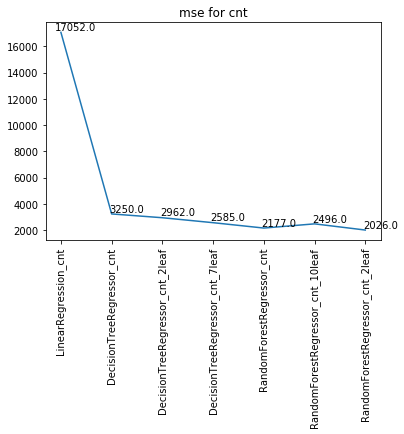

In [252]:
plt.figure()
plt.plot(result_cnt["model_type"],round(result_cnt["mse"],0))
#ax.set_xticks(result_cnt.index)
#ax.set_xticklabels(result_cnt["model_type"], rotation=90)
for i,j in zip(result_cnt["model_type"],round(result_cnt["mse"],0)):
    plt.annotate(j, xy=(i, j), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(15,2), # distance from text to points (x,y)
                 ha='center')
plt.xticks(result_cnt["model_type"],rotation=90)
plt.title("mse for cnt")
plt.show()

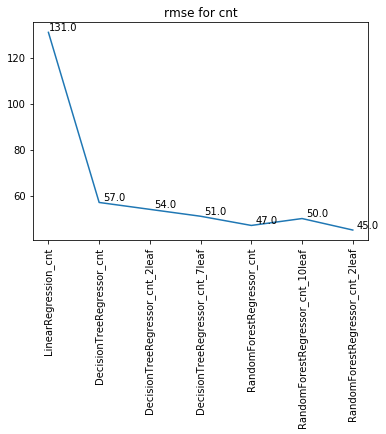

In [253]:
plt.figure()
plt.plot(result_cnt["model_type"],round(result_cnt["rmse"]))
#ax.set_xticks(result_cnt.index)
#ax.set_xticklabels(result_cnt["model_type"], rotation=90)
for i,j in zip(result_cnt["model_type"],round(result_cnt["rmse"])):
    plt.annotate(j, xy=(i, j), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(15,2), # distance from text to points (x,y)
                 ha='center')
plt.xticks(result_cnt["model_type"],rotation=90)
plt.title("rmse for cnt")
plt.show()

**Вывод: **для предсказания значения в столбце ["cnt"] лучшее качество показала модель RandomForestRegressor  с парметром min_samples_leaf=2